<tr>
        <td width="15%">
        </td>
        <td>
            <div align="left">
                <font size=25px>
                    <b>  Fake Job Posting Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>

**Problem Statement**

Online job boards contain thousands of postings which prospective candidates read and submit their applications daily. Unfortunately, some of these job postings are fake and used in order to illegally mine or collect candidate personal information without their knowledge. In this project I have tried to tackle this problem by training and evaluating the performance of several machine learning models to identify these fake job postings with a high degree of accuracy.
In this final project, I am attempting to use several data mining techniques we learned in the course to build and train various machine learning models which can predict whether or not a given job posting is fradulent or not (aka a 'fake' job posting). I will also perform EDA on this data set prior to building the models.


<>**About the dataset**<>

The data set I am using to build and train the models is taken from the following Kaggle link:-

https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction/download?datasetVersionNumber=1

This dataset contains 18K job descriptions out of which about few are fake. This data set is in .csv format and contains 17881 rows and 18 columns including the target class label column.


<>**Data Defination**<>



1)job_id-Identification number given to each job posting.

2)title-A name that describes the position or job

3)location-Information about where the job is located

4)department-Information about the department this job is offered by

5)salary_range-Expected salary range

6)company_profile-Information about the company

7)description-A brief description about the position offered

8)requirements-Pre-requisites to qualify for the job

9)benefits-Benefits provided by the job

10)telecommuting-Is work from home or remote work allowed

11)has_company_logo-Does the job posting have a company logo

12)has_questions-Does the job posting have any questions

13)employment_type-5 categories – Full-time, part-time, contract, temporary and
                   other

14)required_experience-Can be – Internship, Entry Level, Associate, Mid-senior
                       level, Director, Executive or Not Applicable
                         
15)required_education-Can be – Bachelor’s degree, high school degree,
                      unspecified, associate degree, master’s degree,          certification, some college coursework, professional, some high school coursework, vocational

16)Industry-The industry the job posting is relevant to

17)Function-The umbrella term to determining a job’s functionality

18)Fraudulent-Target variable  0: Real, 1: Fake

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.shape

(17880, 18)

In [ ]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [ ]:
df.describe(include='object')

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
count,17880,17534,6333,2868,14572,17879,15185,10670,14409,10830,9775,12977,11425
unique,11231,3105,1337,874,1709,14801,11968,6205,5,7,13,131,37
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology
freq,311,718,551,142,726,379,410,726,11620,3809,5145,1734,1749


In [ ]:
df.duplicated().sum()

0

In [ ]:
print ("Unique values detected in entire data set: \n")
df.nunique()

Unique values detected in entire data set: 



job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [ ]:
print ("Null values detected in entire data set: \n")
df.isnull().sum()

Null values detected in entire data set: 



job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
print ("Precentage wise Null values detected in entire data set: \n")
round(100*(df.isnull().sum()/len(df.index)),2)

Precentage wise Null values detected in entire data set: 



job_id                  0.00
title                   0.00
location                1.94
department             64.58
salary_range           83.96
company_profile        18.50
description             0.01
requirements           15.07
benefits               40.32
telecommuting           0.00
has_company_logo        0.00
has_questions           0.00
employment_type        19.41
required_experience    39.43
required_education     45.33
industry               27.42
function               36.10
fraudulent              0.00
dtype: float64

In [ ]:
## The column "salary range" is  84% null
## It doesn't look like this is usefull for our model,so we drop this column

df = df.drop('salary_range', axis=1)

#### The columns in this data set are mostly categorical, and have a lot of missing values in some of the columns. Because of that we need to decide how to handle the missing values.We are going to replace the missing values depending on the type of data stored in the column.

In [ ]:
df['location'] = df['location'].fillna(value='Other')

In [ ]:
df['department'] = df['department'].fillna(value='Other')
df['company_profile'] = df['company_profile'].fillna(value='')

In [ ]:
df['description'] = df['description'].fillna(value='')
df['requirements'] = df['requirements'].fillna(value='')

In [ ]:
df['benefits'] = df['benefits'].fillna(value='')
df['employment_type'] = df['employment_type'].fillna(value='Other')

In [ ]:
df['required_experience'] = df['required_experience'].fillna(value='Not Applicable')
df['required_education'] = df['required_education'].fillna(value='Unspecified')

In [ ]:
df['industry'] = df['industry'].fillna(value='Other')
df['function'] = df['function'].fillna(value='Other')

In [ ]:
#vmissing values are all replaced
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

## Visualizing the dataset

It would be helpful to know whether there are any correlations between the specific categorical attributes and higher instances of fraud; which we can more easily tell through data visualization.

<Axes: xlabel='fraudulent', ylabel='count'>

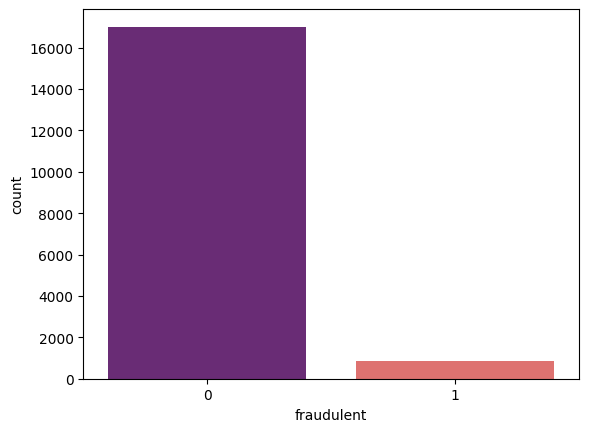

In [ ]:
#checking the counts of fraudulent and non-fraudulent jobs
sns.countplot(x='fraudulent',data=df,palette='magma')

In [ ]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [ ]:
#Visualize Job postings by countries

def split(location):
  l =location.split(',')
  return l[0]

df['country'] =df.location.apply(split)

In [ ]:
df['country'].value_counts()[:11]

US       10656
GB        2384
GR         940
CA         457
DE         383
Other      346
NZ         333
IN         276
AU         214
PH         132
NL         127
Name: country, dtype: int64

In [ ]:
import string

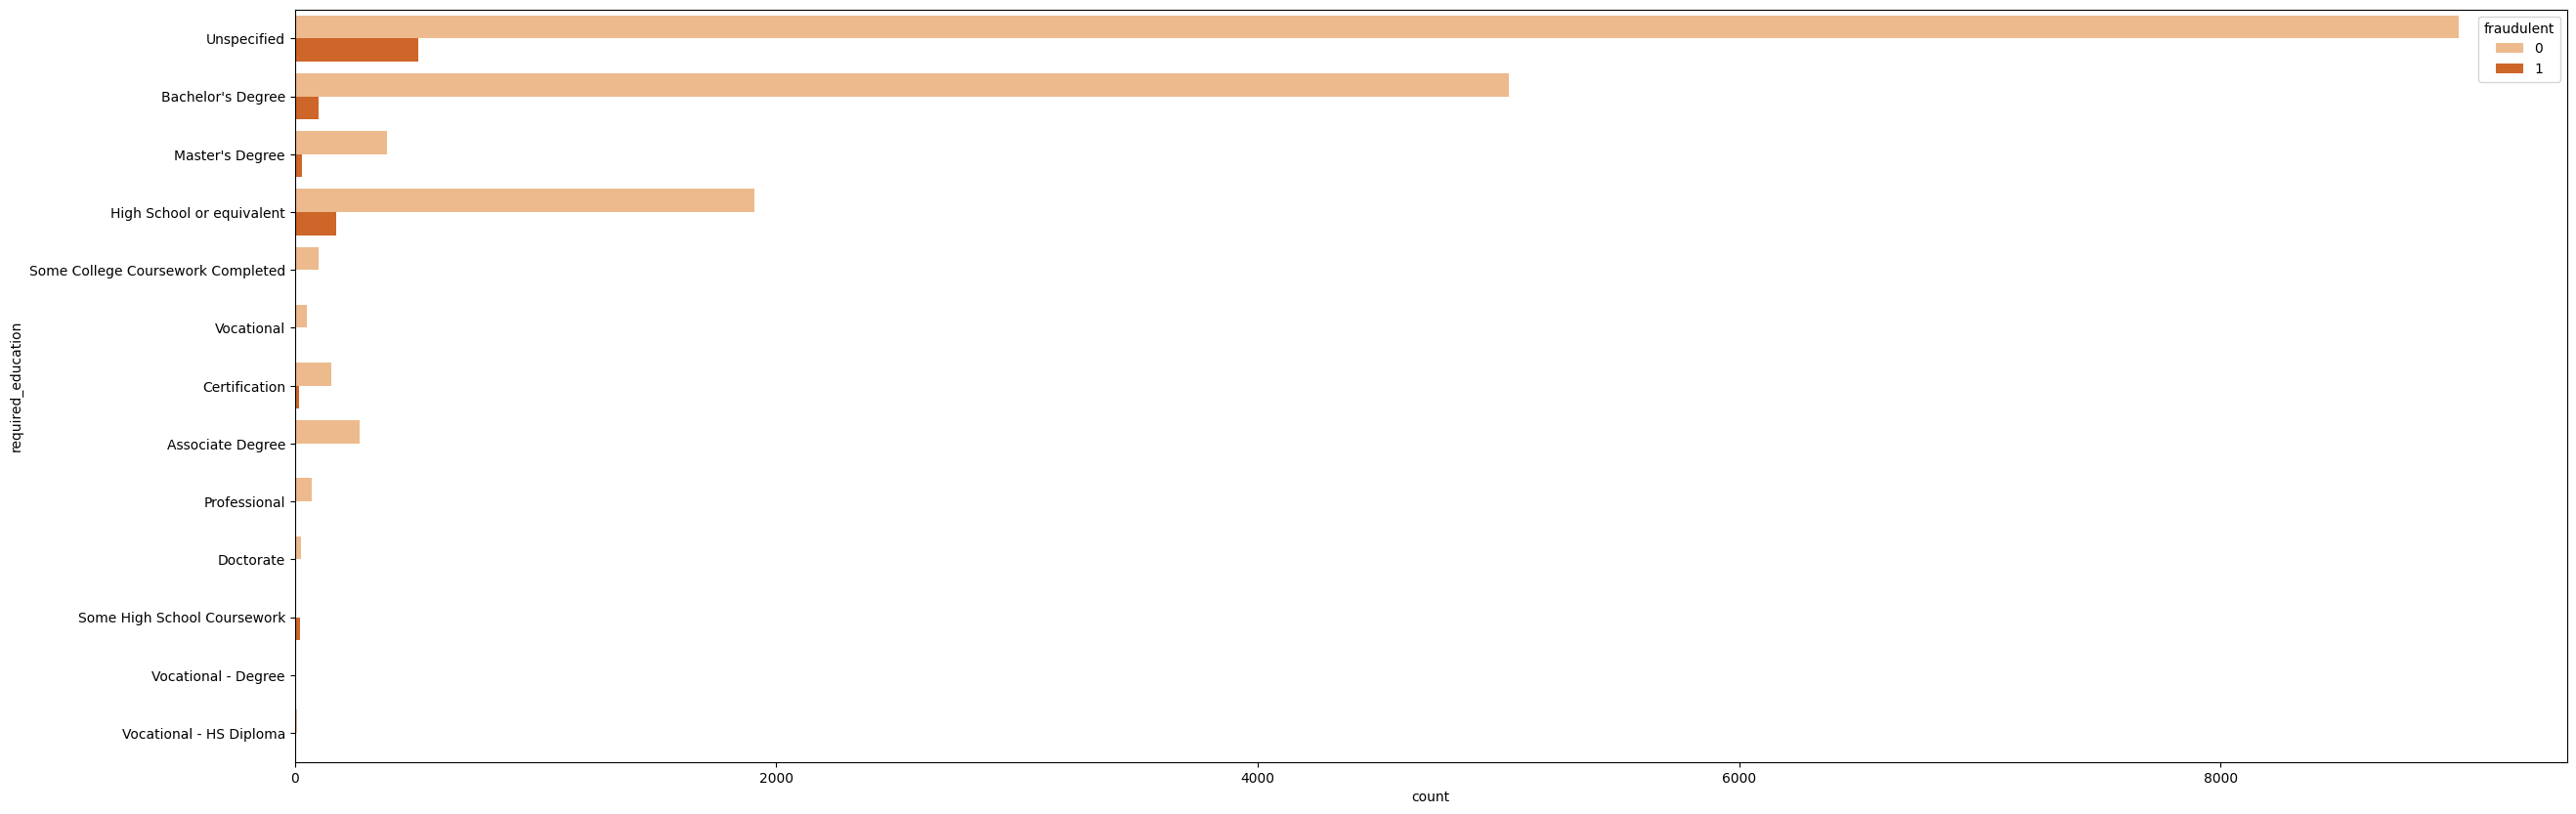

In [ ]:
#Plotting incidents of fraudulent postings by the level of education required
plt.figure(figsize=(30,10))
sns.countplot(palette='Oranges', hue='fraudulent', y='required_education',data=df)
plt.show()

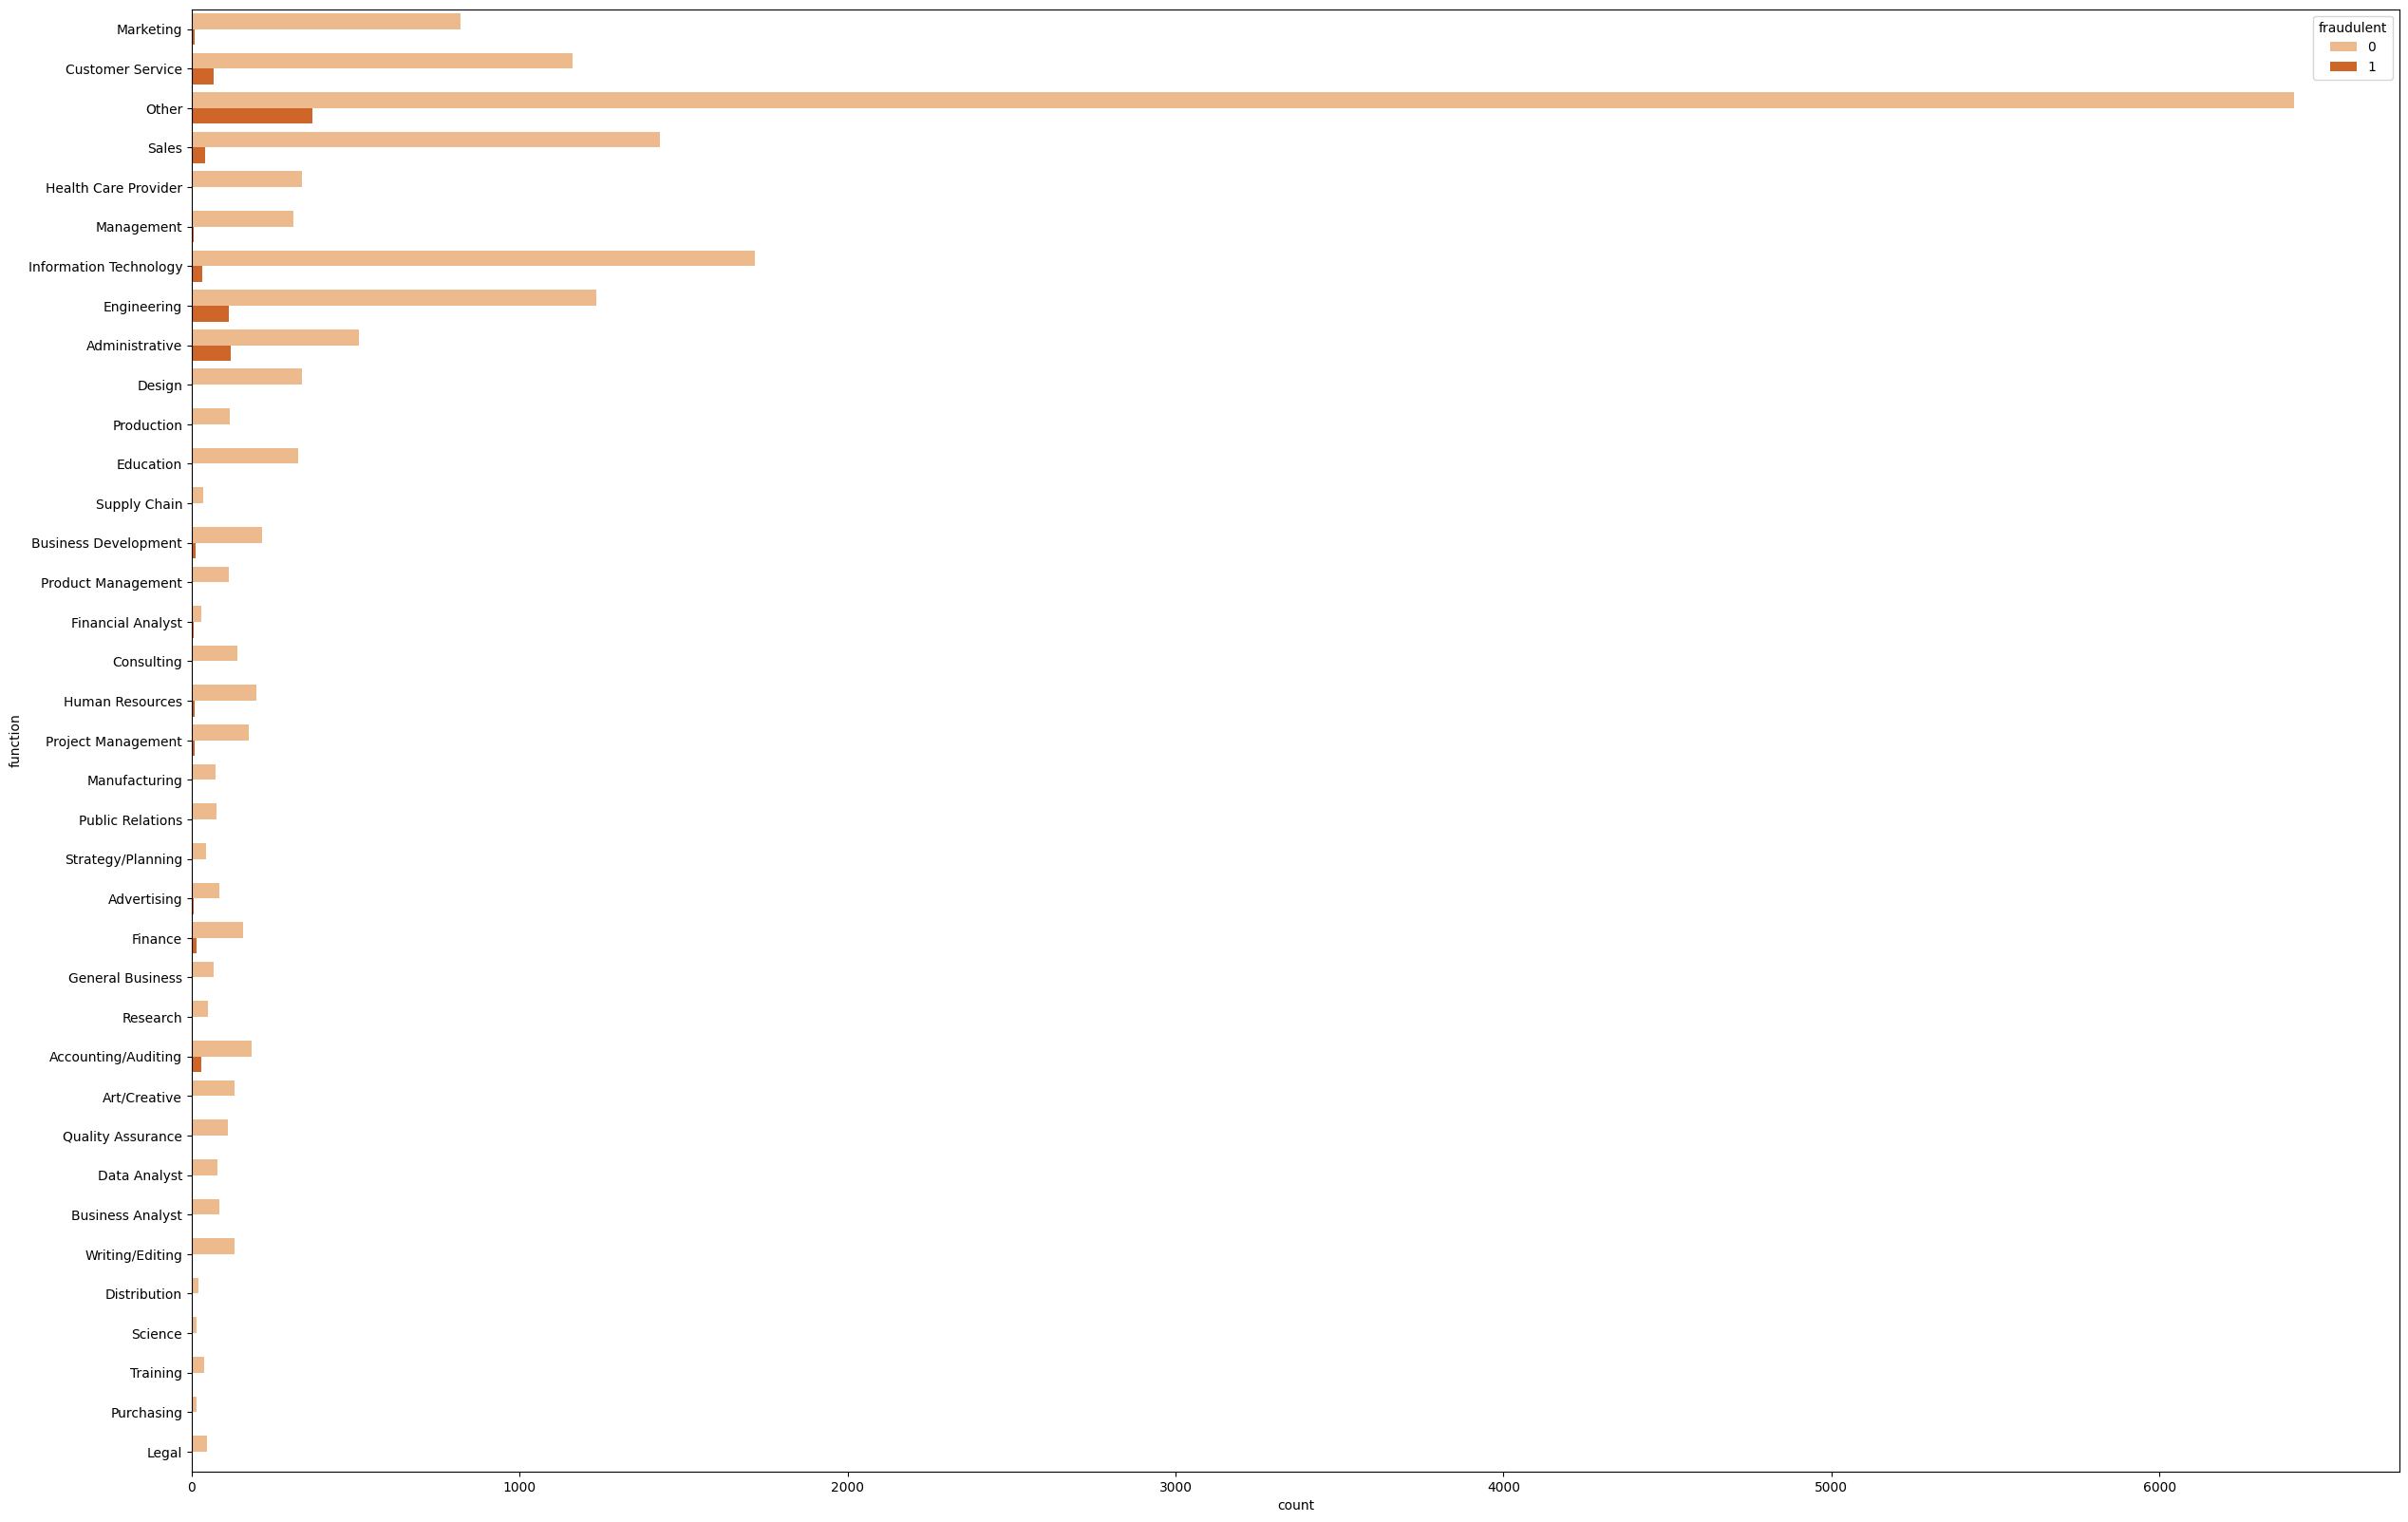

In [ ]:
#Plotting incidence of fraud by the job function
plt.figure(figsize=(30,20))
sns.countplot(palette='Oranges', hue='fraudulent', y='function',data=df)
plt.show()

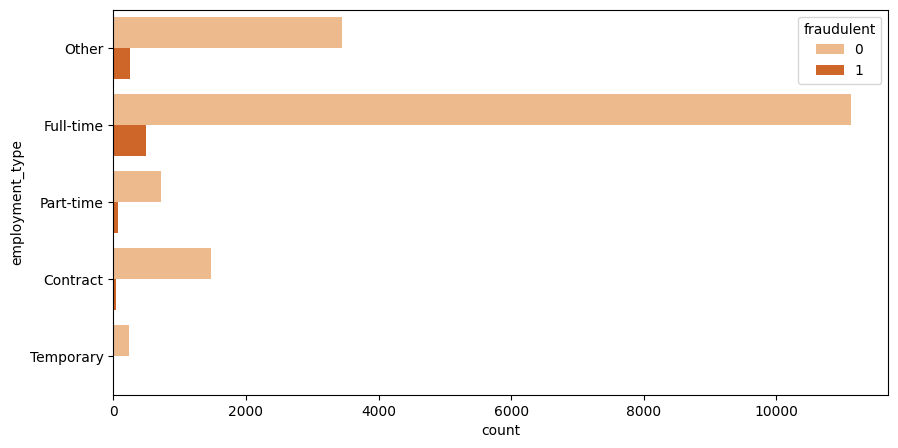

In [ ]:
# Plotting incidence of fraud by employment type
plt.figure(figsize=(10,5))
sns.countplot(palette='Oranges', hue='fraudulent', y='employment_type',data=df)
plt.show()

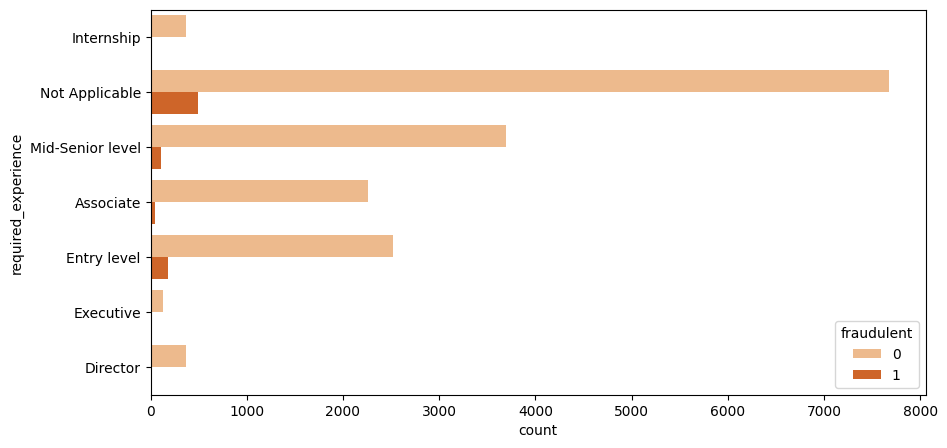

In [ ]:
# Plotting incidence of fraud by experience
plt.figure(figsize=(10,5))
sns.countplot(palette='Oranges', hue='fraudulent', y='required_experience',data=df)
plt.show()

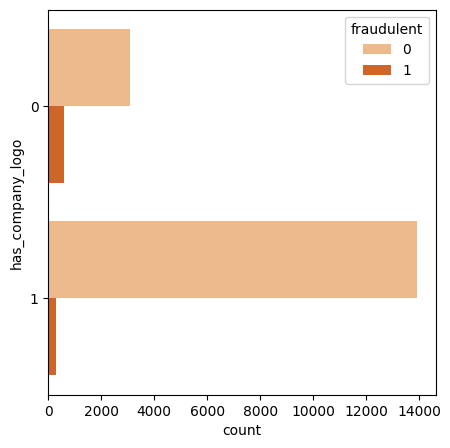

In [ ]:
# Plotting incidence of fraud by company logo
plt.figure(figsize=(5,5))
sns.countplot(palette='Oranges', hue='fraudulent', y='has_company_logo',data=df)
plt.show()

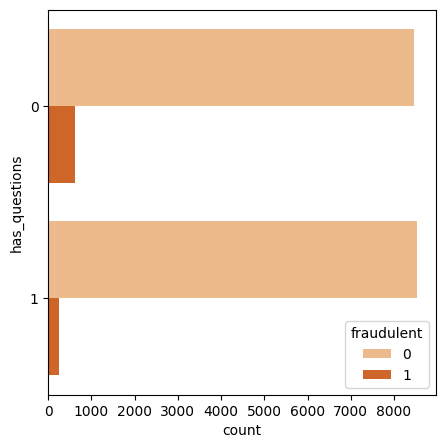

In [ ]:
# Plotting incidence of fraud on basis of questions or no questions
plt.figure(figsize=(5,5))
sns.countplot(palette='Oranges', hue='fraudulent', y='has_questions',data=df)
plt.show()

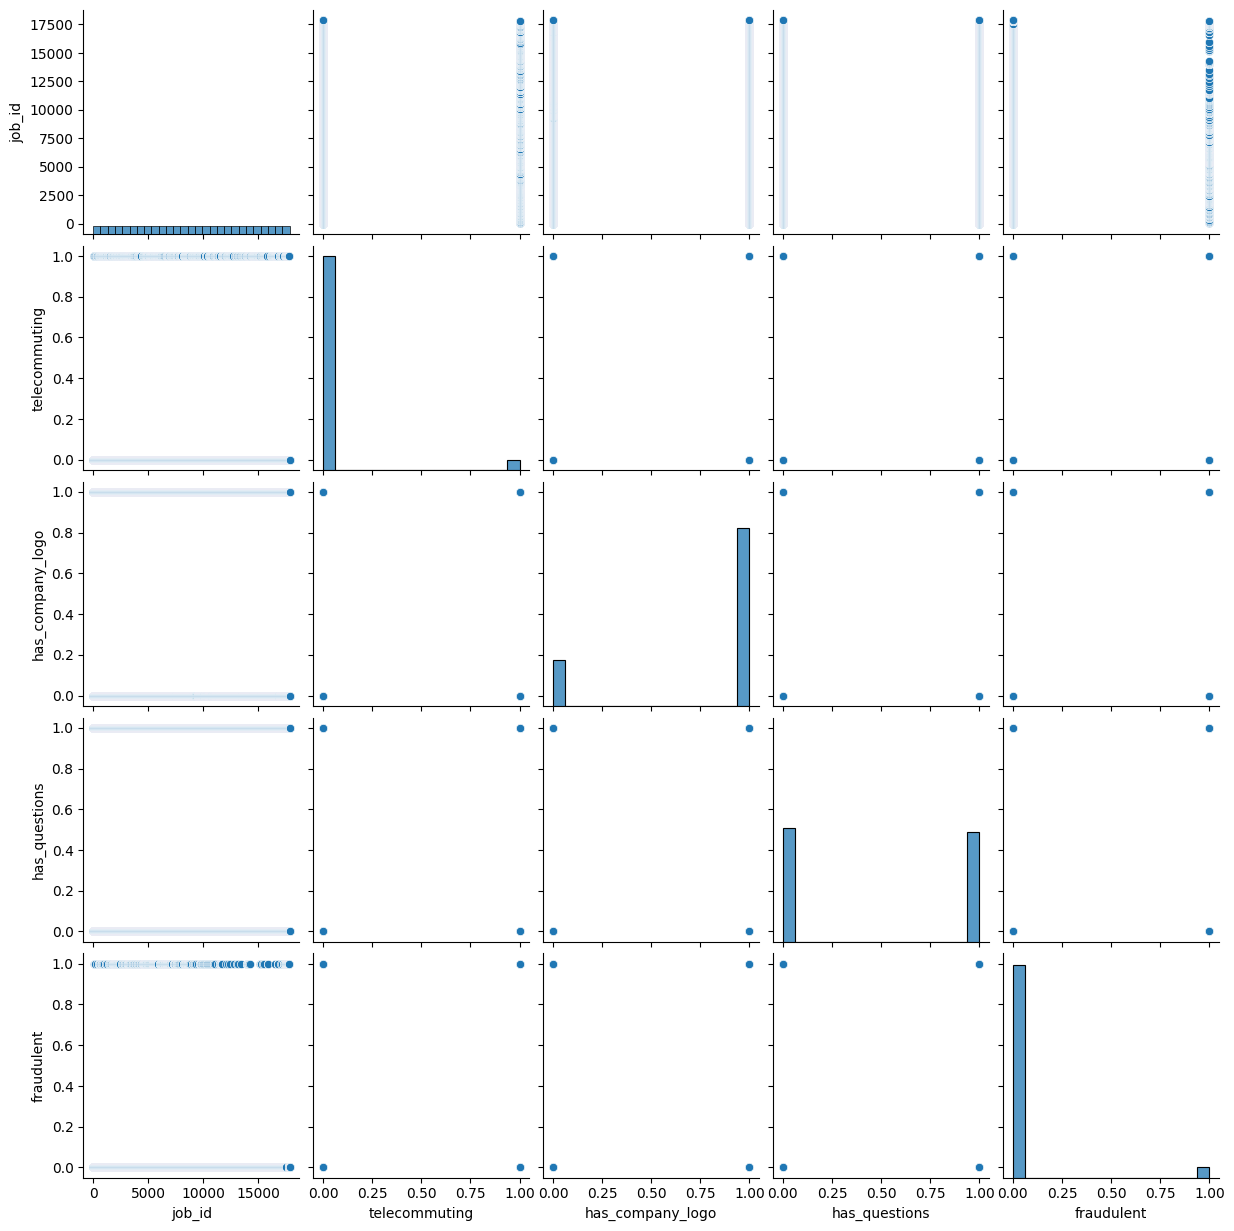

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,-0.004559,-0.014539,-0.087025,0.079872
telecommuting,-0.004559,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.014539,-0.019836,1.000000,0.233932,-0.261971
has_questions,-0.087025,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.079872,0.034523,-0.261971,-0.091627,1.000000


<Axes: >

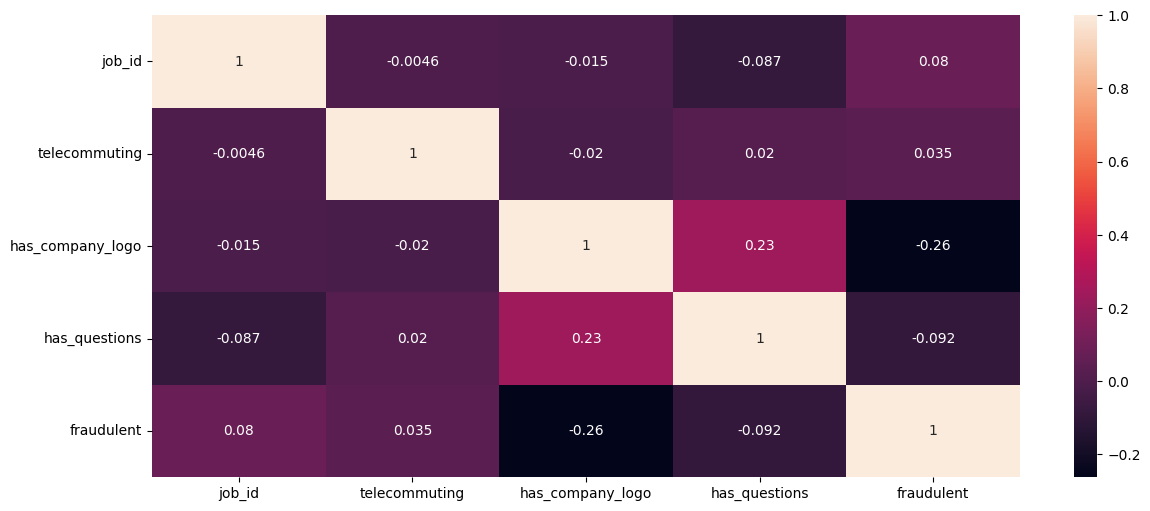

In [ ]:
corr=df.corr()
plt.figure(figsize=(14,6))
sns.heatmap(corr,annot=True,cbar=True)

#Build and evaluate  Machine learning models

#### We implement various classifier models and then attempt to tune them to achieve high accuracy when identifying the fradulent job postings.We split the data set into train and test to allow the model to work on unseen data.We do a validation holdout on the data and plot the performance of the test vs validation results to ensure models aren't overfitting.

In [ ]:
#Before attempting to convert categorical variables I'm going to drop the free text columns that can't be converted
#also I am dropping the job id column since it's an id field that won't inform the model
df = df.drop(['job_id','company_profile','description','benefits','requirements'],axis=1)

In [ ]:
#I am using pd.get_dummies to convert the categorical attributes to boolean columns to be used in the models
#Get dummies will handle creation of the new columns representing possible categorical values as numerical 1/0

df = pd.get_dummies(df, prefix_sep = '_', drop_first=True)
df.shape

(17880, 15954)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dropping class label from features X
X = df.drop('fraudulent',axis=1)

# Target class label assigned to y
y = df['fraudulent']

# 70/30 split of train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=logreg.predict(X_test)

In [ ]:
def draw_cm(actual,predicted):
  cm=metrics.confusion_matrix(actual,predicted)
  sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['Yes','No'],yticklabels=['Yes','No'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

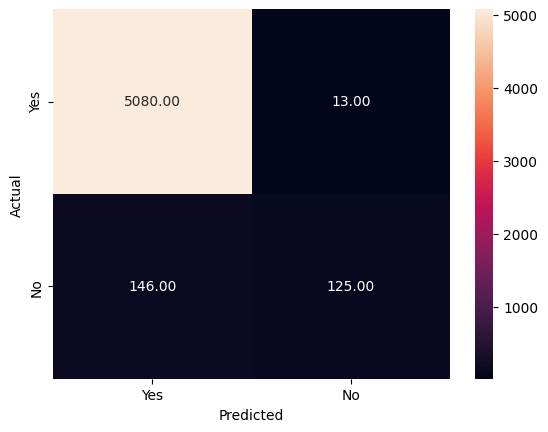

In [ ]:
draw_cm(y_test,y_pred)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,accuracy_score,roc_curve

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5093
           1       0.91      0.46      0.61       271

    accuracy                           0.97      5364
   macro avg       0.94      0.73      0.80      5364
weighted avg       0.97      0.97      0.97      5364



In [ ]:
def ROC_Curve(Actual,Predicted):
  fpr,tpr,thresholds = roc_curve(Actual,Predicted)
  roc = plt.plot(fpr,tpr)
  plt.xlabel('False Possitive Rate')
  plt.ylabel('True Possitive Rate')
  plt.title('ROC Curve')
  plt.show()
  Threshold=thresholds
  return roc,thresholds

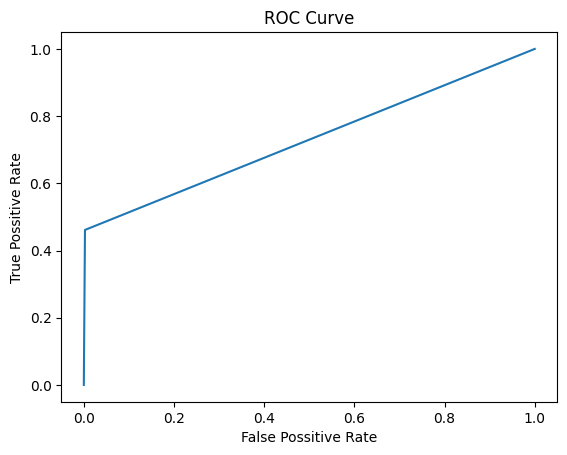

([<matplotlib.lines.Line2D at 0x7da3f18462c0>], array([2, 1, 0]))

In [ ]:
ROC_Curve(y_test,y_pred)

In [ ]:
metrics.roc_auc_score(y_test,y_pred)

0.7293510447376218

In [ ]:
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

In [ ]:
result_tabulation = pd.DataFrame(columns = cols)

In [ ]:
Logistic_reg = pd.Series({'Model': "Logistic Regression",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'f1-score':metrics.f1_score(y_test, y_pred)})

In [ ]:

result_tabulation = result_tabulation.append(Logistic_reg, ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.729351,0.905797,0.461255,0.970358,0.611247


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
from time import time

In [ ]:
start = time()
rfc.fit(X_train,y_train)
print("RandomForestClassifier took %.2f seconds"
      % (time() - start,))

y_pred1 = rfc.predict(X_test)

RandomForestClassifier took 74.18 seconds


In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

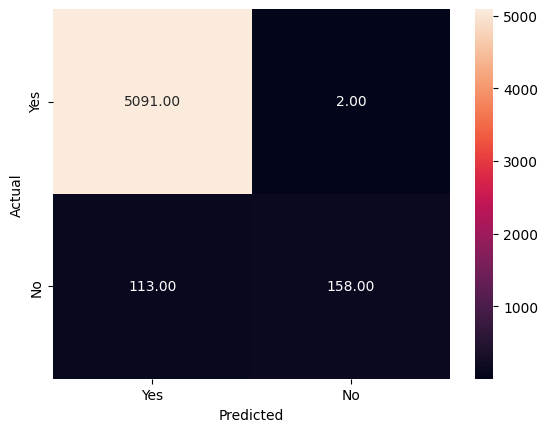

In [ ]:
draw_cm(y_test,y_pred1)

In [ ]:
print(metrics.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5093
           1       0.99      0.58      0.73       271

    accuracy                           0.98      5364
   macro avg       0.98      0.79      0.86      5364
weighted avg       0.98      0.98      0.98      5364



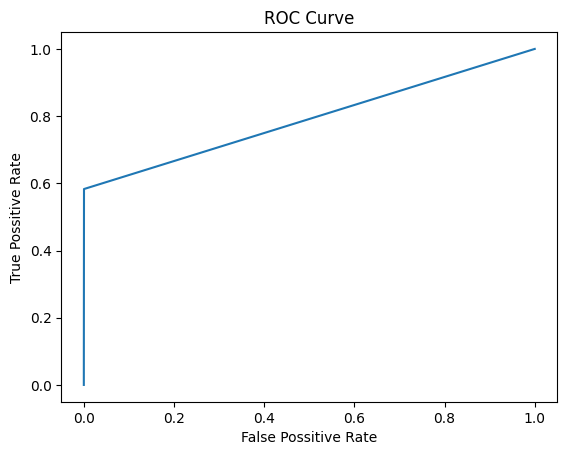

([<matplotlib.lines.Line2D at 0x7da3f11c44c0>], array([2, 1, 0]))

In [ ]:
ROC_Curve(y_test,y_pred1)

In [ ]:
metrics.roc_auc_score(y_test,y_pred1)

0.791316567200622

In [ ]:
Random_Forest = pd.Series({'Model': "Random Forest",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred1),
                 'Precision Score': metrics.precision_score(y_test, y_pred1),
                 'Recall Score': metrics.recall_score(y_test, y_pred1),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred1),
                 'f1-score':metrics.f1_score(y_test, y_pred1)})

In [ ]:
result_tabulation = result_tabulation.append(Random_Forest, ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.729351,0.905797,0.461255,0.970358,0.611247
1,Random Forest,0.791317,0.987500,0.583026,0.978561,0.733179


In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'max_depth': [10, 15],'n_estimators': [10,20], 'max_features': ['sqrt', 0.2]}]

In [ ]:
radm_clf = RandomForestClassifier()
clf = GridSearchCV(radm_clf,tuned_parameters, cv=5, scoring='roc_auc')

In [ ]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 15], 'max_features': ['sqrt', 0.2],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [ ]:
clf.best_score_

0.9173433357134166

In [ ]:
clf.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 20}

In [ ]:
rfc_tunned = RandomForestClassifier(max_depth=15,max_features='sqrt',n_estimators=20)

In [ ]:
rfc_tunned.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=20)

In [ ]:
y_pred1_tunned = rfc_tunned.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred1_tunned))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5093
           1       1.00      0.00      0.01       271

    accuracy                           0.95      5364
   macro avg       0.97      0.50      0.49      5364
weighted avg       0.95      0.95      0.93      5364



In [ ]:
Random_Forest_tunned = pd.Series({'Model': "Random Forest tunned",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred1_tunned),
                 'Precision Score': metrics.precision_score(y_test, y_pred1_tunned),
                 'Recall Score': metrics.recall_score(y_test, y_pred1_tunned),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred1_tunned),
                 'f1-score':metrics.f1_score(y_test, y_pred1_tunned)})

In [ ]:
result_tabulation = result_tabulation.append(Random_Forest_tunned, ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.729351,0.905797,0.461255,0.970358,0.611247
1,Random Forest,0.791317,0.987500,0.583026,0.978561,0.733179
2,Random Forest tunned,0.501845,1.000000,0.003690,0.949664,0.007353


In [ ]:
#importance of features in ascending order
feature_imp = pd.DataFrame(rfc.feature_importances_, index=X_train.columns,
columns=['importance']).sort_values('importance', ascending=False)
feature_imp

,importance
has_company_logo,0.036526
industry_Oil & Energy,0.020341
"location_US, TX, Houston",0.015449
has_questions,0.012833
title_Data Entry Admin/Clerical Positions - Work From Home,0.011947
...,...
title_Junior Data Analyst,0.000000
"title_Senior Consultant - Microsoft Productivity (Office 365, Exchange)",0.000000
title_Junior Coordinator to the Sales Director,0.000000
title_Senior Consultant / Manager,0.000000


#Decission Tree Classifier

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
clf_gini=DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_split =6)

In [ ]:
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=6)

In [ ]:
y_pred_gini=clf_gini.predict(X_test)

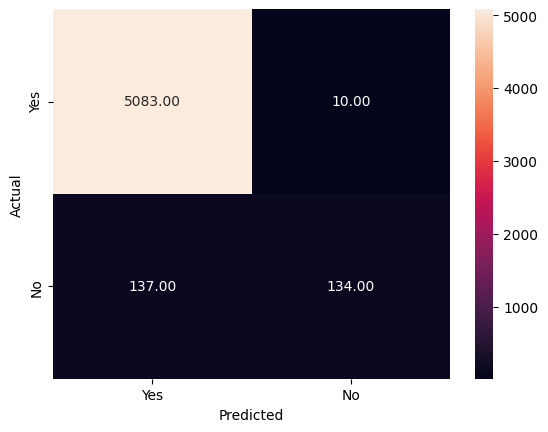

In [ ]:
draw_cm(y_test,y_pred_gini)

In [ ]:
accuracy_score(y_test,y_pred_gini)

0.9725950782997763

In [ ]:
print(metrics.classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5093
           1       0.93      0.49      0.65       271

    accuracy                           0.97      5364
   macro avg       0.95      0.75      0.82      5364
weighted avg       0.97      0.97      0.97      5364



In [ ]:
Decision_Tree = pd.Series({'Model': "Decision Tree",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_gini),
                 'Precision Score': metrics.precision_score(y_test, y_pred_gini),
                 'Recall Score': metrics.recall_score(y_test, y_pred_gini),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_gini),
                 'f1-score':metrics.f1_score(y_test, y_pred_gini)})

In [ ]:
result_tabulation = result_tabulation.append(Decision_Tree, ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.729351,0.905797,0.461255,0.970358,0.611247
1,Random Forest,0.791317,0.987500,0.583026,0.978561,0.733179
2,Random Forest tunned,0.501845,1.000000,0.003690,0.949664,0.007353
3,Decision Tree,0.746251,0.930556,0.494465,0.972595,0.645783


##K Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
start = time()
#fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn=knn.predict(X_test)

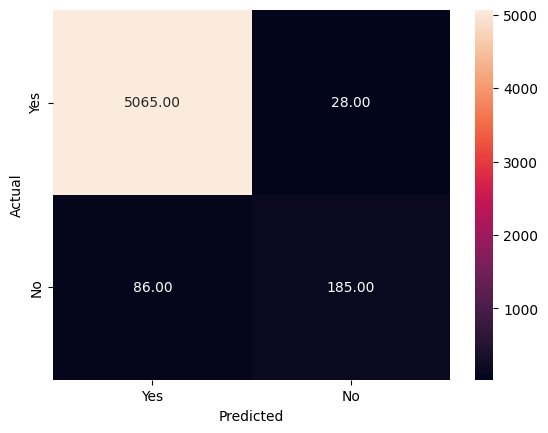

In [ ]:
draw_cm(y_test,y_pred_knn)

In [ ]:
accuracy_score(y_test,y_pred_knn)

0.9787472035794184

In [ ]:
print("KNeighborsClassifier took %.2f seconds"
      % (time() - start,))
print(f"Accuracy: {round(knn.score(X_test, y_test)*100)}%")

KNeighborsClassifier took 107.97 seconds
Accuracy: 98%


In [ ]:
print(metrics.classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5093
           1       0.87      0.68      0.76       271

    accuracy                           0.98      5364
   macro avg       0.93      0.84      0.88      5364
weighted avg       0.98      0.98      0.98      5364



In [ ]:
K_Nearest_Neighbours = pd.Series({'Model': "KNN",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_knn),
                 'Precision Score': metrics.precision_score(y_test, y_pred_knn),
                 'Recall Score': metrics.recall_score(y_test, y_pred_knn),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_knn),
                 'f1-score':metrics.f1_score(y_test, y_pred_knn)})

In [ ]:
result_tabulation = result_tabulation.append(K_Nearest_Neighbours, ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.729351,0.905797,0.461255,0.970358,0.611247
1,Random Forest,0.791317,0.987500,0.583026,0.978561,0.733179
2,Random Forest tunned,0.501845,1.000000,0.003690,0.949664,0.007353
3,Decision Tree,0.746251,0.930556,0.494465,0.972595,0.645783
4,KNN,0.838580,0.868545,0.682657,0.978747,0.764463


###The K Nearest Neighbours classifier achieves a accuracy score of 98% but it takes more time to implement the model.

##Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

In [ ]:
start = time()
#fit the classifier to the training data
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb=nb.predict(X_test)

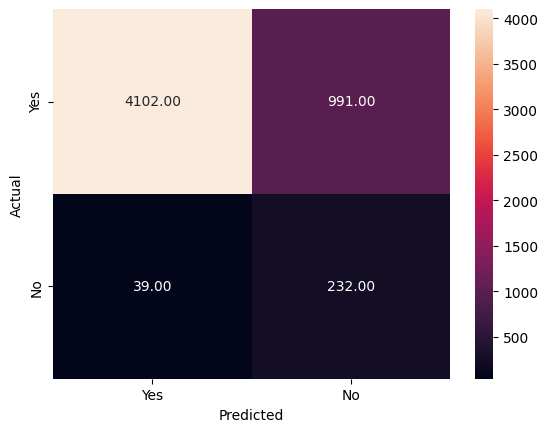

In [ ]:
draw_cm(y_test,y_pred_nb)

In [ ]:
accuracy_score(y_test,y_pred_nb)

0.807979120059657

In [ ]:
print(metrics.classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      5093
           1       0.19      0.86      0.31       271

    accuracy                           0.81      5364
   macro avg       0.59      0.83      0.60      5364
weighted avg       0.95      0.81      0.86      5364



In [ ]:
Gaussian_Naive_bayes = pd.Series({'Model': "Gaussian NB",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_nb),
                 'Precision Score': metrics.precision_score(y_test, y_pred_nb),
                 'Recall Score': metrics.recall_score(y_test, y_pred_nb),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_nb),
                 'f1-score':metrics.f1_score(y_test, y_pred_nb)})

In [ ]:
result_tabulation = result_tabulation.append(Gaussian_Naive_bayes, ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.729351,0.905797,0.461255,0.970358,0.611247
1,Random Forest,0.791317,0.987500,0.583026,0.978561,0.733179
2,Random Forest tunned,0.501845,1.000000,0.003690,0.949664,0.007353
3,Decision Tree,0.746251,0.930556,0.494465,0.972595,0.645783
4,KNN,0.838580,0.868545,0.682657,0.978747,0.764463
5,Gaussian NB,0.830754,0.189697,0.856089,0.807979,0.310576


####The Gaussian Naieve Bayes classifier achieves a accuracy score of 81%.

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)

In [ ]:
gradient_booster.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_gb=gradient_booster.predict(X_test)

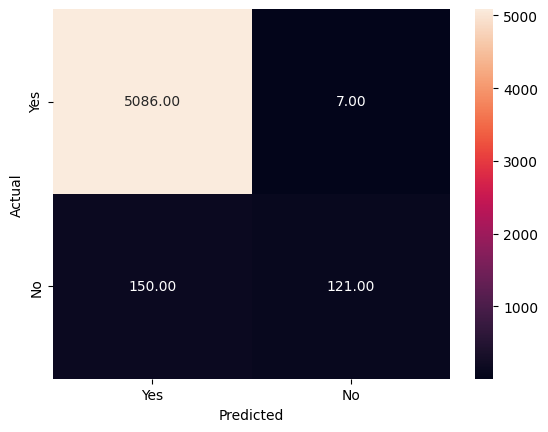

In [ ]:
draw_cm(y_test,y_pred_gb)

In [ ]:
accuracy_score(y_test,y_pred_gb)

0.970730797912006

In [ ]:
print("Gradient Booting Classifer took %.2f seconds"
      % (time() - start,))
print("Accuracy: 97%")

Gradient Booting Classifer took 854.52 seconds
Accuracy: 97%


In [ ]:
print(metrics.classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5093
           1       0.95      0.45      0.61       271

    accuracy                           0.97      5364
   macro avg       0.96      0.72      0.80      5364
weighted avg       0.97      0.97      0.97      5364



In [ ]:
Gradient_Boosting = pd.Series({'Model': "Gradient Boosting",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_gb),
                 'Precision Score': metrics.precision_score(y_test, y_pred_gb),
                 'Recall Score': metrics.recall_score(y_test, y_pred_gb),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_gb),
                 'f1-score':metrics.f1_score(y_test, y_pred_gb)})

In [ ]:
result_tabulation = result_tabulation.append(Gradient_Boosting, ignore_index = True)
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.729351,0.905797,0.461255,0.970358,0.611247
1,Random Forest,0.791317,0.987500,0.583026,0.978561,0.733179
2,Random Forest tunned,0.501845,1.000000,0.003690,0.949664,0.007353
3,Decision Tree,0.746251,0.930556,0.494465,0.972595,0.645783
4,KNN,0.838580,0.868545,0.682657,0.978747,0.764463
5,Gaussian NB,0.830754,0.189697,0.856089,0.807979,0.310576
6,Gradient Boosting,0.722560,0.945312,0.446494,0.970731,0.606516


### Tracking Model Performance
#### Accuracy scores for each of the models when running on the train/test data split. As we can see, the ensemble and KNN models generally performed the best, however the NB classifier also performed comparably, but time required for some models was more compared to other models so we select models acordingly. Accuracy is as follows;

|Model Name|Type|Accuracy score|
|:--|:--|:--
|LR|Logistic Regression|97.0|
|RF|Random Forest Classifier|98.0|
|RF(T)|Random Forest Classifier(Tunned)|94.64|
|DT|Decission Tree Classifier|97.0|
|NB|Gaussian Naieve Bayes Classifier|80.0|
|knn|K Nearest Neighbors Classifier|97.0|
|GB|Gradient Boosting|97.07|

#Conclusions

####Ensemble learning method Random Forest works well on this data set due to the relative predictive power of the categorical features and also that they are uncorrelated, so RF can operate relatively to increase the total accuracy.
####Random Forest when tuned on parameters gave less acuuracy(94.64%).
####K Nearest Neighbors and Gradient boosting achieved satisfactory results but time taken for testing and getting results was more as compared to Random Forest,so it was not time efficient.
####Gaussian Naive Bayes gave us the least Accuracy for given data(80%)

###So we conclude that Random Forest is the best Algorithm that suits the given data as it gives us the highest Accuracy(98%),faster as compared to other models and helps understand the important parameters.